In [0]:
import math
import numpy as np
from matplotlib import pyplot as plt

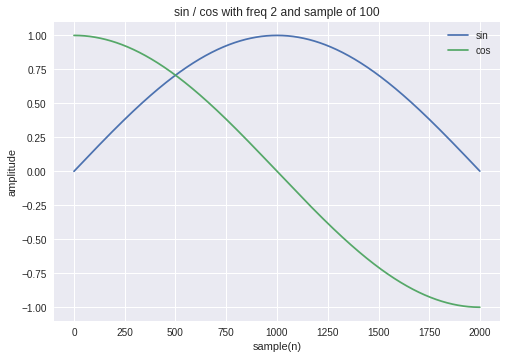

In [115]:
# Generate a cos wave
Fs = 1000     # sampling rate, Hz, must be integer
f = 1         # sine frequency, Hz, may be float
duration = 2  # in seconds, may be float
x = np.arange(Fs * duration)
sen = np.sin(np.pi / 2 * f * x / Fs)
cos = np.cos(np.pi / 2 * f * x / Fs)

plt.plot(sen, label='sin')
plt.plot(cos, label='cos')
plt.title('sin / cos with freq 2 and sample of 100')
plt.xlabel('sample(n)')
plt.ylabel('amplitude')
plt.legend()
plt.show()

250


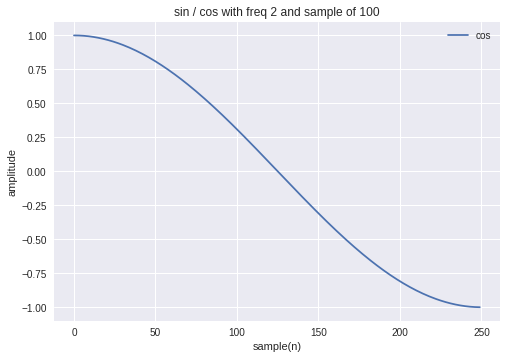

In [116]:
print(len(cos[::8]))
plt.plot(cos[::8], label='cos')
plt.title('sin / cos with freq 2 and sample of 100')
plt.xlabel('sample(n)')
plt.ylabel('amplitude')
plt.legend()
plt.show()

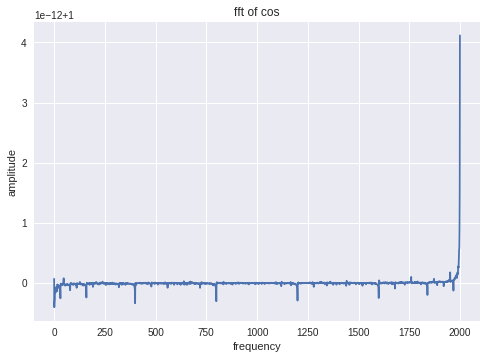

In [117]:
plt.plot(np.fft.fft(cos).real)
plt.title('fft of cos')
plt.xlabel('frequency')
plt.ylabel('amplitude')
plt.show()

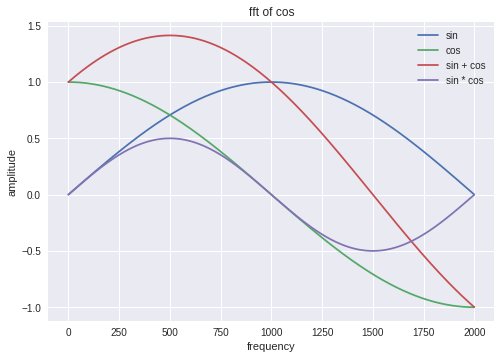

In [118]:
plt.plot(sen, label='sin')
plt.plot(cos, label='cos')
plt.plot(sen + cos, label='sin + cos')
plt.plot(sen * cos, label='sin * cos')
# plt.plot(np.convolve(sen, cos))
plt.title('fft of cos')
plt.xlabel('frequency')
plt.ylabel('amplitude')
plt.legend()
plt.show()

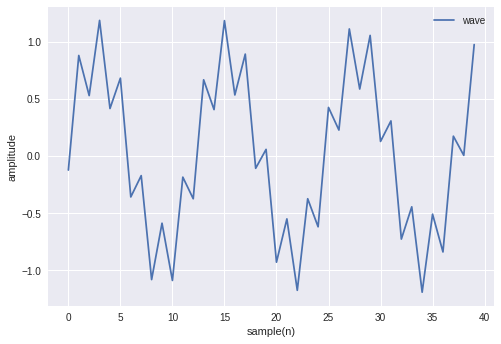

In [119]:
x = np.arange(20 * 2)
wave = .89 * np.cos(x/2 - 26.5) + .303 * np.cos(np.pi * x - 72.3)
plt.plot(wave, label='wave')
plt.xlabel('sample(n)')
plt.ylabel('amplitude')
plt.legend()
plt.show()

In [0]:
def sistema_desconhecido(x):
    N = 400
    n = np.arange(N)
    hn = (1/2) * np.exp(-0.3 * abs(n - 100)) * np.cos(math.pi/10 * n)
    y = np.convolve(hn, x)
    return y, hn

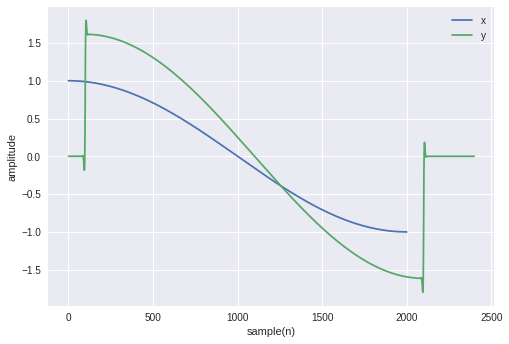

In [121]:
y, hm = sistema_desconhecido(cos)
plt.plot(cos, label='x')
plt.plot(y, label='y')
plt.xlabel('sample(n)')
plt.ylabel('amplitude')
plt.legend()
plt.show()

Média de h1: 0.04027352385482645
Média de h2: 0.04027352385482674
False


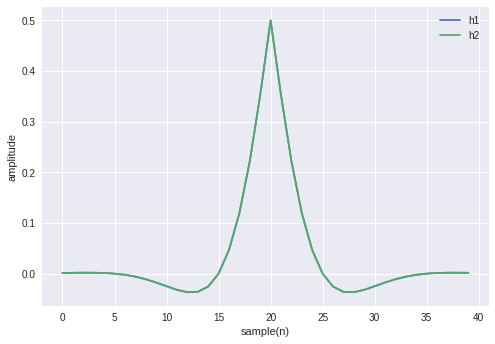

In [140]:
xn = np.zeros(y.shape)
xn[:len(cos)] = cos
h = (np.fft.ifft(np.fft.fft(y) / np.fft.fft(xn))).real

h1, h2 = h[80:120], hm[80:120]
print('Média de h1:', np.mean(h1))
print('Média de h2:', np.mean(h2))
print(np.array_equal(h1, h2))

plt.plot(h1, label='h1')
plt.plot(h2, label='h2')
plt.xlabel('sample(n)')
plt.ylabel('amplitude')
plt.legend()
plt.show()

Média de h1: 0.0004168403501460837
Média de cos: 0.0005
False


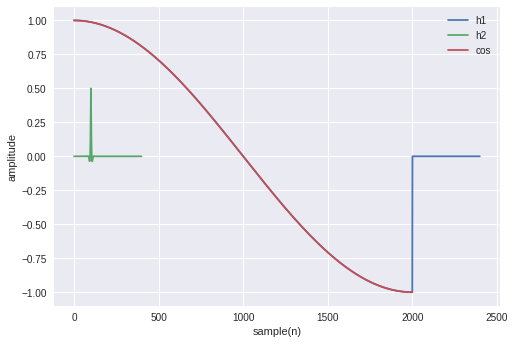

In [135]:
xn = np.zeros(y.shape)
xn[:len(hm)] = hm
h = (np.fft.ifft(np.fft.fft(y) / np.fft.fft(xn))).real

h1, h2 = h, hm
print('Média de h1:', np.mean(h1))
print('Média de cos:', np.mean(cos))
print(np.array_equal(h1, cos))

plt.plot(h1, label='h1')
plt.plot(h2, label='h2')
plt.plot(cos, label='cos')
plt.xlabel('sample(n)')
plt.ylabel('amplitude')
plt.legend()
plt.show()